In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('chess/lichess-08-2014.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,PGN,Mode,Result,Average Rating,Rating Difference,Termination Type
0,0,1. e4 g6 2. d4 Bg7 3. c3 d6 4. Qf3 Nf6 5. h3 O...,Classical,Black Wins,1538,-262,Time forfeit
1,1,1. d4 Nf6 2. c4 g6 3. a3 Bg7 4. Nf3 O-O 5. Nc3...,Blitz,Black Wins,1492,-220,Time forfeit
2,2,1. e4 c5 2. Qf3 e5 3. Bc4 Nf6 4. Nh3 h6 5. g4 ...,Blitz,White Wins,1413,213,Normal
3,3,1. e4 e5 2. Nf3 d6 3. Nc3 f5 4. exf5 Bxf5 5. d...,Blitz,Black Wins,1444,-358,Normal
4,4,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Ne4 5. Nce2...,Bullet,White Wins,1931,117,Normal


In [2]:
# Check for missing data
missing_data = df.isnull().sum()

# Check for data types of each column
data_types = df.dtypes

missing_data, data_types


(Unnamed: 0           0
 PGN                  0
 Mode                 0
 Result               0
 Average Rating       0
 Rating Difference    0
 Termination Type     0
 dtype: int64,
 Unnamed: 0            int64
 PGN                  object
 Mode                 object
 Result               object
 Average Rating        int64
 Rating Difference     int64
 Termination Type     object
 dtype: object)

In [3]:
# Basic statistics for numeric columns
numeric_stats = df.describe()

# Distribution for categorical columns
categorical_distribution = {
    "Mode": df["Mode"].value_counts(),
    "Result": df["Result"].value_counts(),
    "Termination Type": df["Termination Type"].value_counts()
}

numeric_stats, categorical_distribution


(          Unnamed: 0  Average Rating  Rating Difference
 count  843230.000000   843230.000000      843230.000000
 mean   421614.500000     1628.875648           6.529306
 std    243419.678083      214.677886         197.918471
 min         0.000000      886.000000       -1622.000000
 25%    210807.250000     1479.000000        -101.000000
 50%    421614.500000     1623.000000           6.000000
 75%    632421.750000     1772.000000         114.000000
 max    843229.000000     2572.000000        1534.000000,
 {'Mode': Blitz             372651
  Bullet            235828
  Classical         232835
  Correspondence      1916
  Name: Mode, dtype: int64,
  'Result': White Wins    427513
  Black Wins    385198
  Draw           30519
  Name: Result, dtype: int64,
  'Termination Type': Normal              560233
  Time forfeit        282850
  Abandoned               86
  Rules infraction        61
  Name: Termination Type, dtype: int64})

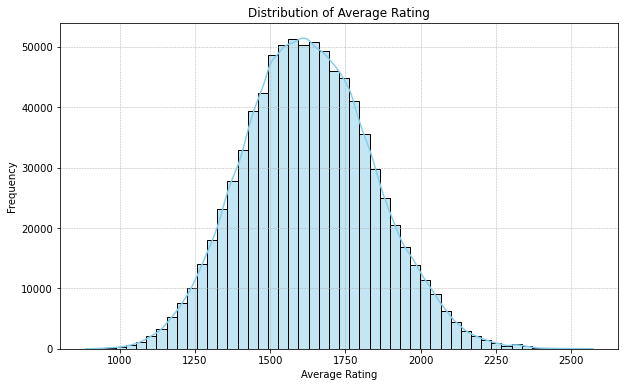

In [6]:
# Visualizing Average Rating
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df["Average Rating"], kde=True, color="skyblue", bins=50)
plt.title("Distribution of Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

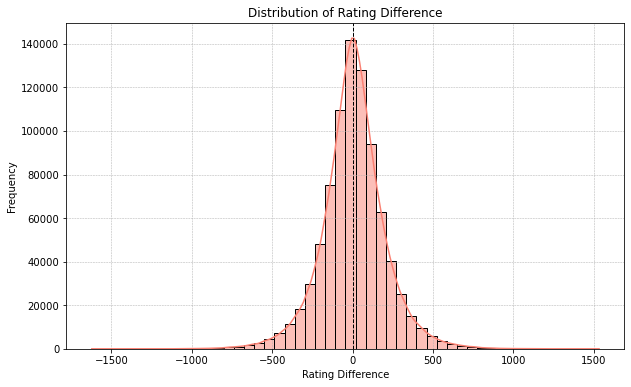

In [7]:
# Visualizing Rating Difference

plt.figure(figsize=(10, 6))
sns.histplot(df["Rating Difference"], kde=True, color="salmon", bins=50)
plt.title("Distribution of Rating Difference")
plt.xlabel("Rating Difference")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.show()

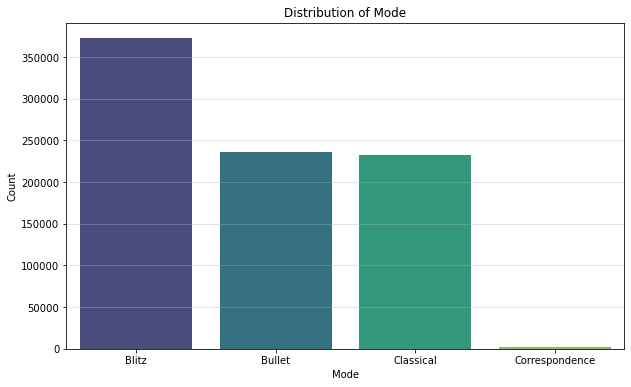

In [8]:
# Visualizing Mode

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Mode", order=df["Mode"].value_counts().index, palette="viridis")
plt.title("Distribution of Mode")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

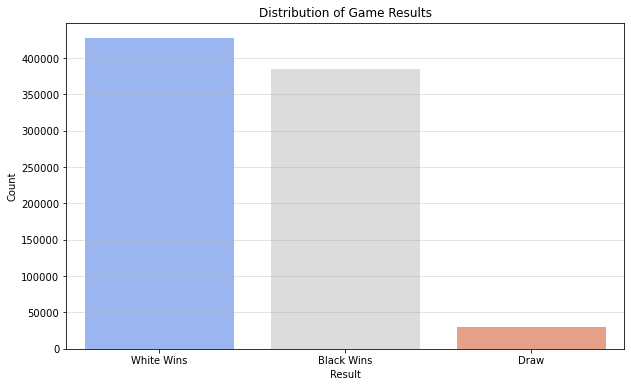

In [9]:
# Visualizing Result

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Result", order=df["Result"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Game Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

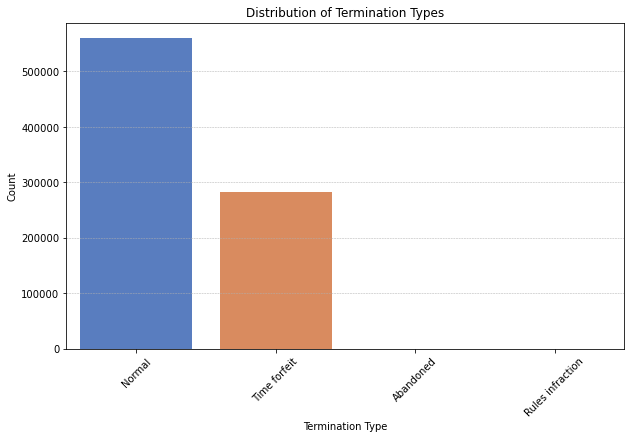

In [10]:
# Visualizing Termination Type

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Termination Type", order=df["Termination Type"].value_counts().index, palette="muted")
plt.title("Distribution of Termination Types")
plt.xlabel("Termination Type")
plt.ylabel("Count")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

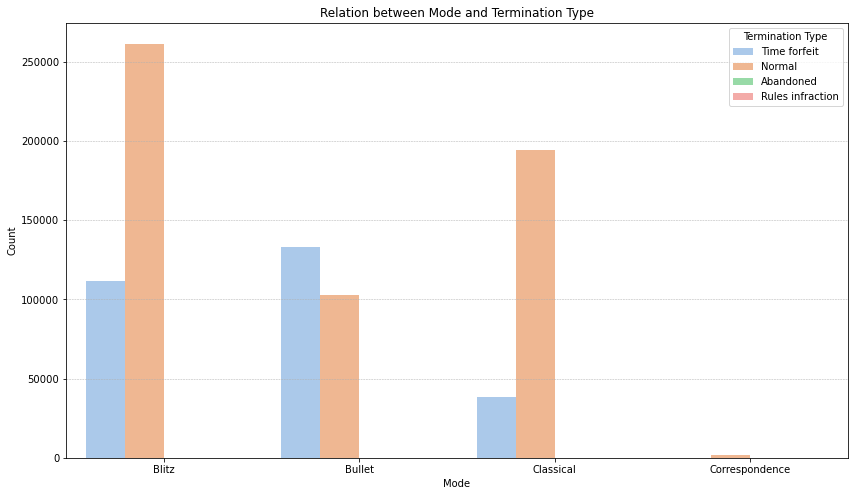

In [11]:
# Visualizing the relationship between Mode and Termination Type

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="Mode", hue="Termination Type", palette="pastel", order=df["Mode"].value_counts().index)
plt.title("Relation between Mode and Termination Type")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.legend(title="Termination Type", loc="upper right")
plt.show()

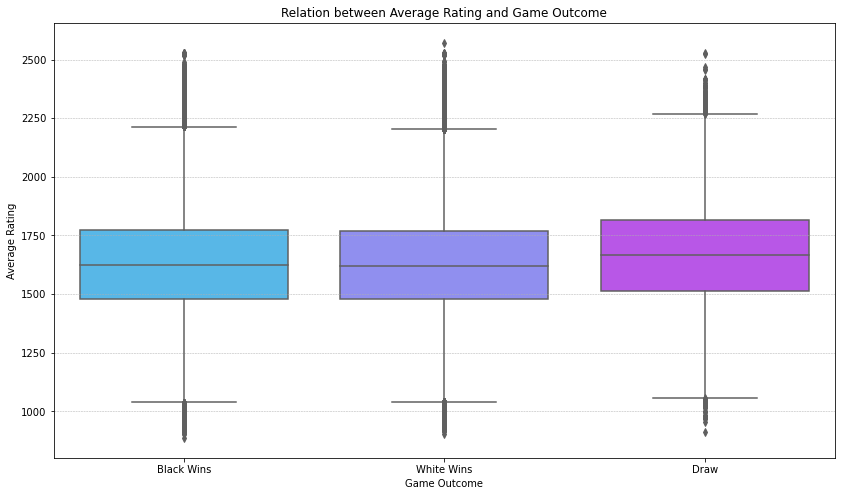

In [12]:
# Visualizing the relationship between Average Rating and Game Outcome

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Result", y="Average Rating", palette="cool")
plt.title("Relation between Average Rating and Game Outcome")
plt.xlabel("Game Outcome")
plt.ylabel("Average Rating")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

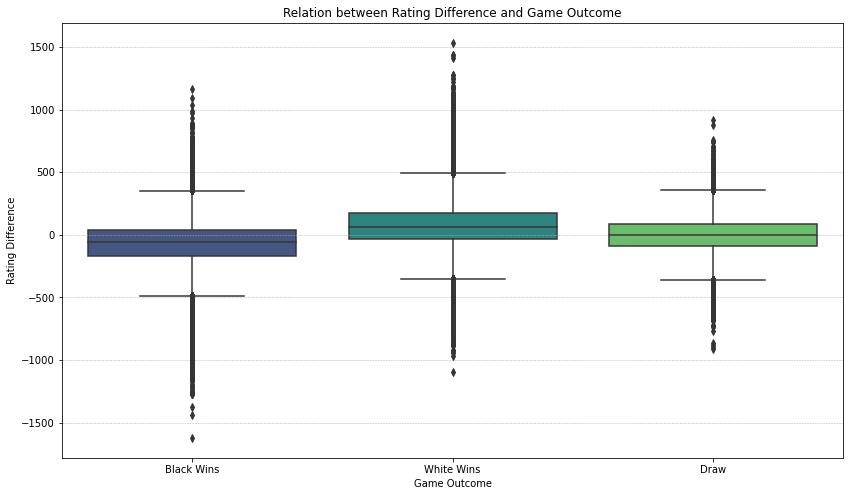

In [13]:
# Visualizing the relationship between Rating Difference and Game Outcome

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Result", y="Rating Difference", palette="viridis")
plt.title("Relation between Rating Difference and Game Outcome")
plt.xlabel("Game Outcome")
plt.ylabel("Rating Difference")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

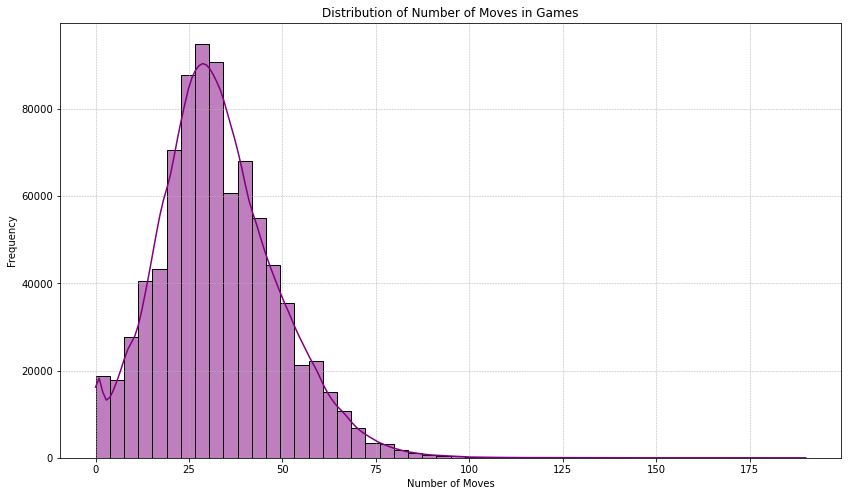

In [14]:
# More memory-efficient approach to extract number of moves
df["Number of Moves"] = df["PGN"].str.count(" ") // 3  # Approximating number of moves by counting spaces

# Visualizing the distribution of number of moves
plt.figure(figsize=(14, 8))
sns.histplot(df["Number of Moves"], kde=True, color="purple", bins=50)
plt.title("Distribution of Number of Moves in Games")
plt.xlabel("Number of Moves")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [17]:
# Using a more memory-efficient approach to extract the first move
sample_df = df.sample(frac=0.1, random_state=42)  # Taking a sample to reduce memory usage
sample_df["First Move"] = sample_df["PGN"].str.split().str[0]

# Counting the occurrences of each first move in the sample
first_move_counts_sample = sample_df["First Move"].value_counts().head(10)

first_move_counts_sample

# Correcting the extraction process for the first move
sample_df["First Move Corrected"] = sample_df["PGN"].str.extract(r'1\. (\w+)')

# Counting the occurrences of each first move in the sample
first_move_counts_corrected = sample_df["First Move Corrected"].value_counts().head(10)

first_move_counts_corrected

e4     48335
d4     20948
Nf3     2600
e3      2532
c4      2435
g3      1843
b3      1639
f4      1072
d3       939
b4       458
Name: First Move Corrected, dtype: int64

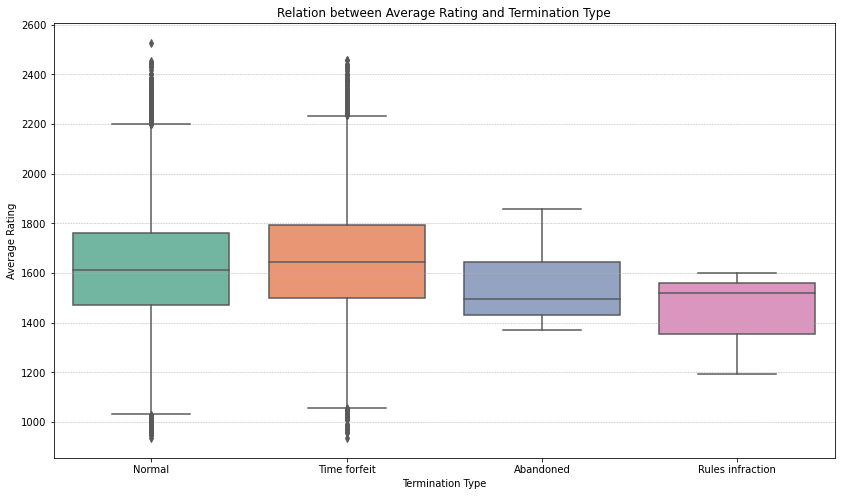

In [18]:
# Visualizing the relationship between Average Rating and Termination Type

plt.figure(figsize=(14, 8))
sns.boxplot(data=sample_df, x="Termination Type", y="Average Rating", palette="Set2")
plt.title("Relation between Average Rating and Termination Type")
plt.xlabel("Termination Type")
plt.ylabel("Average Rating")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

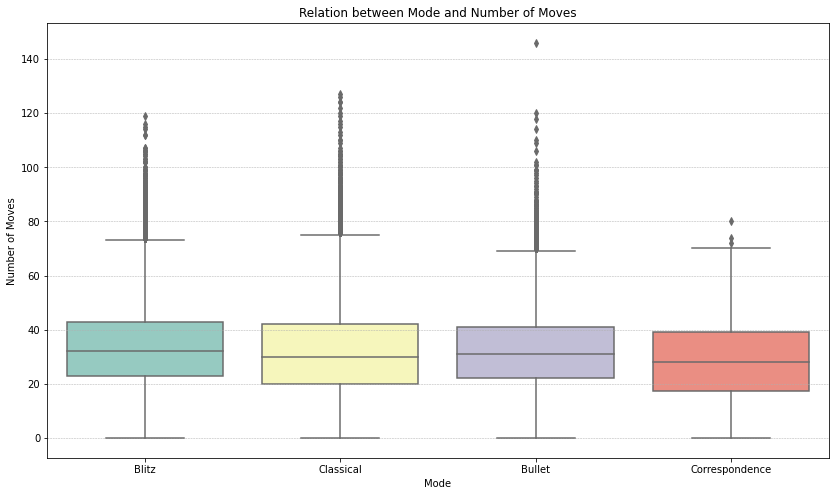

In [19]:
# Visualizing the relationship between Mode and Number of Moves

plt.figure(figsize=(14, 8))
sns.boxplot(data=sample_df, x="Mode", y="Number of Moves", palette="Set3")
plt.title("Relation between Mode and Number of Moves")
plt.xlabel("Mode")
plt.ylabel("Number of Moves")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()

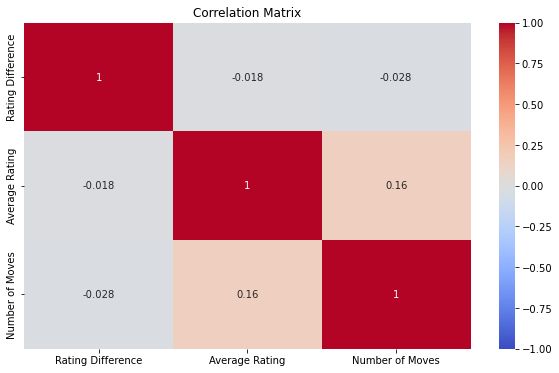

In [20]:
# Computing correlations between selected numerical variables
correlation_matrix = sample_df[["Rating Difference", "Average Rating", "Number of Moves"]].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

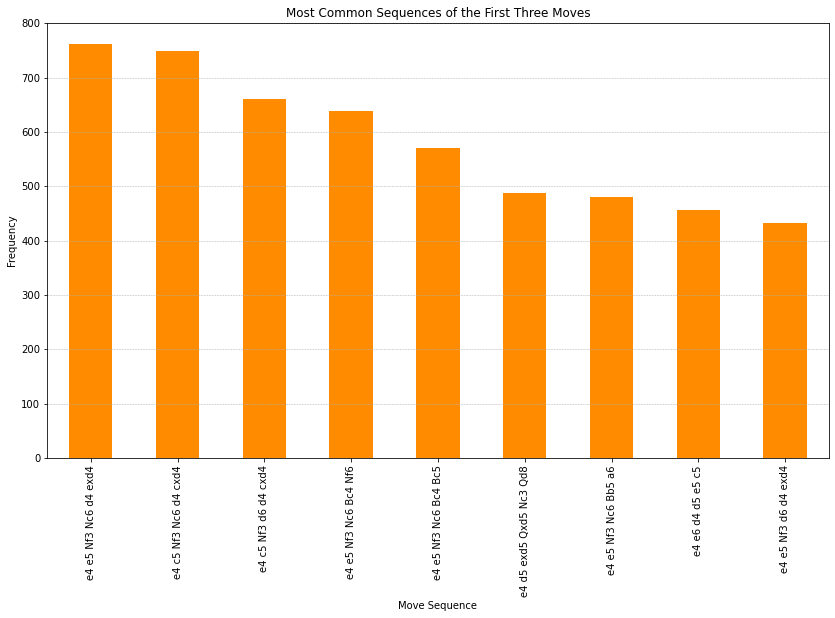

In [22]:
# Filling NaN values and joining the moves
first_three_moves_sequence = sample_df["PGN"].str.extract(r'1\. (\w+ \w+) 2\. (\w+ \w+) 3\. (\w+ \w+)')
first_three_moves_sequence = first_three_moves_sequence.fillna("-")
sample_df["First Three Moves"] = first_three_moves_sequence.agg(' '.join, axis=1)

# Counting the occurrences of each sequence in the sample
first_three_moves_counts = sample_df["First Three Moves"].value_counts().head(10)

first_three_moves_counts


# Visualizing the most common sequences of the first three moves

plt.figure(figsize=(14, 8))
first_three_moves_counts[first_three_moves_counts.index != "- - -"].plot(kind='bar', color='darkorange')
plt.title("Most Common Sequences of the First Three Moves")
plt.xlabel("Move Sequence")
plt.ylabel("Frequency")
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5)
plt.show()